In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/saisisir/Downloads/Sisir Entain Laptop/Self Learning /Machine Learning/Kaggle Practice/8. Lasso Regression/BostonHousingData.csv')

In [3]:
data.shape

(506, 14)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
null_feat = [feature for feature in data.columns if data[feature].isnull().sum() >= 1]

In [6]:
null_feat

['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

In [7]:
for feature in data[null_feat]:
    data[feature] = data[feature].fillna(data[feature].mean())

In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

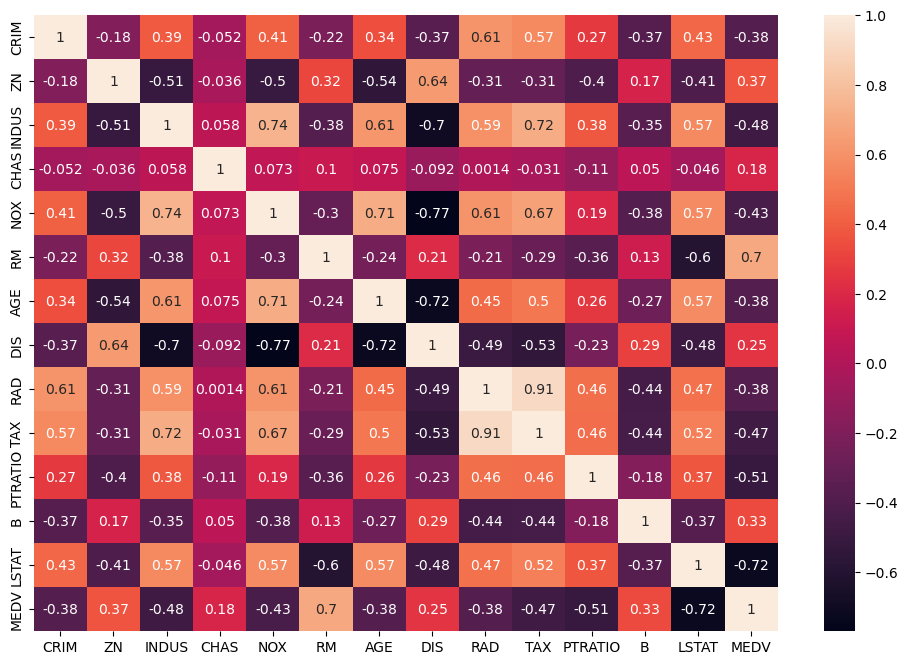

In [9]:
import seaborn as sns
plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(), annot = True)

In [10]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1].values
y = y.reshape(-1,1)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)
lin_reg.score(x_test, y_test)

0.6588520195508163

In [13]:
lin_reg.score(x_train, y_train)

0.7420299863537105

In [14]:
#Ridge Regression L2
from sklearn.linear_model import Ridge
rid_reg = Ridge(alpha = 0.3, max_iter = 100, tol = 0.1)
rid_reg.fit(x_train, y_train)
rid_reg.score(x_train, y_train)

0.7416954226462236

In [15]:
rid_reg.score(x_test, y_test)

0.6580608226694054

In [ ]:
#We see Ridge Regression too gives almost the same accuracy as Linear Regression. For more accuracy, we need to play with the parameters of Ridge Regression. 